In [15]:
# evitando mensagem warning
import warnings
warnings.filterwarnings('ignore')

# Bicliotecas de Ciência de Dados
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import pyplot

Transformando o Dataset para csv

In [ ]:
wb = pd.read_excel('CobusSA.xlsx')
df = pd.DataFrame(wb)
df.to_csv('CobusSA_csv.csv',sep=',',index=False, encoding='utf-8')

In [17]:
df = pd.read_csv('CobusSA_csv.csv')

Vericando as variáveis númericas

In [ ]:
df.info()

In [ ]:
df.head(5)

Quantos registros por pais, verificamos que existem muitos paises com poucos registor e que não fazem tanto sentido para nossa analise, isso mostra que nosso dataset está muito desequilibrado na quantidade de registros 

In [ ]:
df['Country'].value_counts()

Transformando a coluna COUNTRY com dummies para verificar os paises por colunas

In [21]:
aux = pd.get_dummies(df, columns=['Country'])

Após fazer a separação da coluna COUNTRY ficou claro que alguns paises deveriam ser retirados que para o nosso problema não fazem sentido

In [22]:
aux.drop(columns=['Country_(blank)','Country_Not assigned', 'Country_Suriname', 'Country_Thailand', 'Country_US',
'Country_USA','Country_UZ', 'Country_French Guiana', 'Country_Guyana', 'Country_Italy', 'Country_KR',
'Country_MX', 'Country_DE', 'Country_EC', 'Country_ES', 'Country_Germany'], axis=1, inplace=True)

In [23]:
df_final = aux.copy()

Visualizando o dataset final 

In [ ]:
df_final

In [25]:
df.shape

(66183, 7)

In [ ]:
df.describe()

Histograma apenas das variáveis numéricas

In [ ]:
for col in df_final.columns:
    if df_final.dtypes[col] in ('int64', 'float64'):
        fig = plt.figure(figsize =(3,3))
        plt.title(col)
        pyplot.hist(df[col])
        pyplot.show()

In [ ]:
for col in df_final.columns:
    if df_final.dtypes[col] in ('int64', 'float64'):
        fig = plt.figure(figsize =(4,4))
        ax = sb.boxplot(y=df[col])

Com a ajuda do boxplot conseguimos ver que em todas as variáveis temos outliers.

Não temos dados faltantes.

In [ ]:
df.isnull().sum()

In [ ]:
df_final.head()

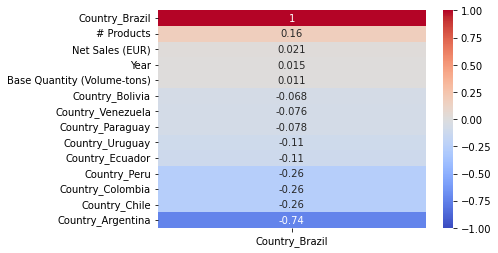

In [34]:
upp_mat = np.triu(df_final.corr())
sb.heatmap(df_final.corr()[['Country_Brazil']].sort_values(by='Country_Brazil', ascending=False), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');